# Introduction to Scikit Learn (sklearn)

what we're going to cover:

0. An end-to-end Scikit-Learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make prediction on our data
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [1]:
import numpy as np

## 0. An end-to-end Scikit-Learn workflow

In [2]:
# 1. Getting the data ready
import pandas as pd
heart_disease = pd.read_csv(r"data\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X
X = heart_disease.drop("target", axis=1)

# Create y
y = heart_disease["target"]

In [4]:
# 2. Choose the right estimator and hayperparameter
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# params for hyperparameter tunning (for now using default)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. Fit the model /algorithm to the training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [7]:
# Make a prediction
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0])

In [8]:
y_test

289    0
113    1
57     1
280    0
56     1
      ..
81     1
176    0
137    1
29     1
168    0
Name: target, Length: 61, dtype: int64

In [9]:
# 4. Evaluating a model
clf.score(X_train, y_train)

1.0

In [10]:
clf.score(X_test, y_test)

0.8524590163934426

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.86      0.89      0.87        35

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [12]:
confusion_matrix(y_test, y_pred)

array([[21,  5],
       [ 4, 31]])

In [13]:
accuracy_score(y_test, y_pred)

0.8524590163934426

In [14]:
# 5. Improve a model
np.random.seed(42)

for i in range(10, 110, 10):
    print(f"Trying model with {i} estimator..")
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test)}")
    print("")

Trying model with 10 estimator..
Model accuracy on test set: 0.8524590163934426

Trying model with 20 estimator..
Model accuracy on test set: 0.8688524590163934

Trying model with 30 estimator..
Model accuracy on test set: 0.819672131147541

Trying model with 40 estimator..
Model accuracy on test set: 0.819672131147541

Trying model with 50 estimator..
Model accuracy on test set: 0.8524590163934426

Trying model with 60 estimator..
Model accuracy on test set: 0.8360655737704918

Trying model with 70 estimator..
Model accuracy on test set: 0.8524590163934426

Trying model with 80 estimator..
Model accuracy on test set: 0.8360655737704918

Trying model with 90 estimator..
Model accuracy on test set: 0.8524590163934426

Trying model with 100 estimator..
Model accuracy on test set: 0.8360655737704918



In [15]:
# 6. Save and load a trained model
import pickle

pickle.dump(clf, open("random_forest_classifier.pkl", "wb"))

In [16]:
loaded_model = pickle.load(open("random_forest_classifier.pkl", "rb"))
loaded_model.score(X_test, y_test)

0.8360655737704918

## 1. Getting the data ready to be used with Machine Learning

The main conten:
1. Split the data into features and labels (usully 'X' and 'y')
2. Filling or disregarding missing values
3. Converting non-numeric values to numeric values (Also called feature encoding)

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
# 1. Split the data into feature and labels
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

In [20]:
# 1. Getting the data ready
car_sales = pd.read_csv("data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [21]:
# 2. Split the data into feature and labels
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split the data
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [22]:
# 3. Choose the right estimator
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)

In [23]:
# Converting categorical features into numerical 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                               remainder="passthrough")
X_transformer = transformer.fit_transform(X)
X_transformer

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [24]:
pd.DataFrame(data=X_transformer)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [25]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]], dtype=int)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [26]:
# Re-fit the model
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_transformer, y, test_size=0.2)

model.fit(X_train, y_train)

RandomForestRegressor()

In [27]:
# 4. Evaluating model
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?

1. Fill them with some values (also know as imputation)
2. Remove the sample with missing data altogether

In [28]:
# 1. Getting the data ready
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [29]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

#### Option 1: Fill missing values with pandas

In [30]:
car_sales_missing["Make"] = car_sales_missing["Make"].fillna("missing")
car_sales_missing["Colour"] = car_sales_missing["Colour"].fillna("missing")
car_sales_missing["Odometer (KM)"] = car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean())
car_sales_missing["Doors"] = car_sales_missing["Doors"].fillna(4)
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [31]:
# Remove rows with missing price values
car_sales_missing = car_sales_missing.dropna()
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [32]:
# Create X & y
X = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [33]:
# Converting categorical features into numerical
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

X_transformer = transformer.fit_transform(car_sales_missing)
X_transformer

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with scikit-learn

In [34]:
car_sales_missing_new = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing_new

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [35]:
car_sales_missing_new.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
car_sales_missing_new = car_sales_missing_new.dropna()

In [37]:
X = car_sales_missing_new.drop("Price", axis=1)
y = car_sales_missing_new["Price"]

In [38]:
car_sales_missing_new = pd.to_numeric(car_sales_missing_new["Odometer (KM)"])
car_sales_missing_new.info()

<class 'pandas.core.series.Series'>
Index: 773 entries, 0 to 999
Series name: Odometer (KM)
Non-Null Count  Dtype  
--------------  -----  
773 non-null    float64
dtypes: float64(1)
memory usage: 12.1 KB


In [39]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_impute = SimpleImputer(strategy="constant", fill_value="missing")
doors_impute = SimpleImputer(strategy="constant", fill_value=4)
num_impute = SimpleImputer(strategy="mean")

cat_feature = ["Make", "Colour"]
doors_feature = ["Doors"]
num_feature = ["Odometer (KM)"]

transformer = ColumnTransformer([("cat_feature", cat_impute, cat_feature),
                                 ("doors_feature", doors_impute, doors_feature),
                                 ("num_impute", num_impute, num_feature)],
                                remainder="passthrough")

X_filled = transformer.fit_transform(X)
X_filled

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [40]:
car_sales_filled_new = pd.DataFrame(X_filled, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_new

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
768,BMW,Blue,3.0,163322.0
769,Toyota,Black,4.0,35820.0
770,Nissan,Blue,4.0,66604.0
771,Honda,White,4.0,215883.0


In [41]:
# Converting categorical features into numerical
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

X_transformer = transformer.fit_transform(car_sales_filled_new)
X_transformer

array([[0.0, 1.0, 0.0, ..., 1.0, 0.0, 35431.0],
       [1.0, 0.0, 0.0, ..., 0.0, 1.0, 192714.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 84714.0],
       ...,
       [0.0, 0.0, 1.0, ..., 1.0, 0.0, 66604.0],
       [0.0, 1.0, 0.0, ..., 1.0, 0.0, 215883.0],
       [0.0, 0.0, 0.0, ..., 1.0, 0.0, 248360.0]], dtype=object)

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X_transformer, y, test_size=0.2)

model_1 = RandomForestRegressor()
model_1.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.35930666172697523

## 2. Choose the right estimator/algorithm for our problems

The main conten:

- Sklearn refres to machine learning models, algorithms as estimators.
- Classifications problem - predict a category (heart disease or not)
- Regression problem - predict a numbering (housing price)

https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a regression problem

In [43]:
# Getting the data ready
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [44]:
housing_df = pd.DataFrame(data=housing["data"], columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [45]:
housing_df["MedHouseVal"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [46]:
# Create X and y
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

In [47]:
# Choose the right estimator and hayperparameter
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.ensemble import RandomForestRegressor

lasso = Lasso()
elas = ElasticNet()
rfr = RandomForestRegressor()
ridge = Ridge()

# random seed
np.random.seed(42)

# split dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
lasso.fit(X_train, y_train)
elas.fit(X_train, y_train)
rfr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

# evaluating the model
print(f"with Lasso algorithm : {lasso.score(X_test, y_test)}\nwith ElasticNet algorithm : {elas.score(X_test, y_test)}\nwith RandomForestRegressior algorithm : {rfr.score(X_test, y_test)}\nwith Ridge algorithm : {ridge.score(X_test, y_test)}")

with Lasso algorithm : 0.2841671821008396
with ElasticNet algorithm : 0.41655189098028234
with RandomForestRegressior algorithm : 0.8067938239475755
with Ridge algorithm : 0.5758549611440125


### 2.2 Picking a machine learning model for a classification problem

In [48]:
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [49]:
# Create X and y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [50]:
# Choose the right estimator and hayperparameter
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# setup random seed
np.random.seed(42)

# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
rfc.fit(X_train, y_train)

# evaluation
rfc.score(X_test, y_test)

0.8524590163934426

# 3. Fit the model/algorithm and use it to make prediction on our data

- `predict() and predic_proba()`

In [51]:
# Choose the right estimator and hayperparameter
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# setup random seed
np.random.seed(42)

# split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the model
rfc.fit(X_train, y_train)

# evaluation
rfc.score(X_test, y_test)

0.8524590163934426

In [52]:
# predict() used to predict the actual class or value for a given set of input data
rfc.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [53]:
# predict_proba() return probabilities of a classification label
rfc.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

# Evaluating a machine learning models

1. estimator's build in `score()` method
2. the `scoring` parameter
3. problem-spesific metric function 

## 4.1 Evaluating a model with `score()`

In [54]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model
model = RandomForestClassifier()

# Fit classifier model to trained data
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# The hih value for the `score()` method is 1.0, the lowest is 0.0
model.score(X_train, y_train)

1.0

In [56]:
model.score(X_test, y_test)

0.8524590163934426

### 4.2 the `scoring` parameter

`cross_val_score()` penting untuk mendapatkan ukuran performa model yang lebih akurat dan stabil dengan cara mengujinya secara berulang pada berbagai bagian data yang berbeda, sehingga hasilnya lebih dapat dipercaya dan bukan hanya karena kebetulan.

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [57]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Create train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create classifier model
model = RandomForestClassifier()

# Fit classifier model to trained data
model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# cross val
np.mean(cross_val_score(model, X, y, cv=10))

np.float64(0.8180645161290322)

In [59]:
# single score
model.score(X_test, y_test)

0.8524590163934426

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report
   
**Accuracy**
akurasi yang dimaksud disini ialah sebuah hasil rata rata atau `mean()` dari hasil `cross_val_score`.

In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestClassifier(n_estimators=100)
cross_val = cross_val_score(model, X, y, cv=5)

cross_val

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [61]:
print(f"Cross-validat Accuracy score : {np.mean(cross_val) * 100:.2f}%")

Cross-validat Accuracy score : 82.48%


**Area under ROC/AUC curve**

- True Positive = Model predicts 1 when truth is 1
- False Positive = Model predicts 1 when truth is 0
- False Negative = Model predicts 0 when truth is 0
- False Negative = Model predicts 0 when truth is 1

In [62]:
from sklearn.metrics import roc_curve

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the models
model.fit(X_train, y_train)

# Make probability predict
y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [63]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [64]:
tpr, fpr, thresholds = roc_curve(y_test, y_probs_positive)
tpr, fpr, thresholds

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
        0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
        0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
        1.        ]),
 array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
        0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
        0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
        0.9375 , 0.96875, 0.96875, 1.     , 1.     ]),
 array([ inf, 1.  , 0.98, 0.95, 0.92, 0.88, 0.87, 0.86, 0.85, 0.83, 0.81,
        0.8 , 0.77, 0.76, 0.71, 0.66, 0.6 , 0.57, 0.49, 0.4 , 0.38, 0.31,
        0.28, 0.23, 0.2 , 0.  ]))

**Confusion Matrix with matplotlib + seaborn and scikit-learn**

In [65]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)

<Axes: >

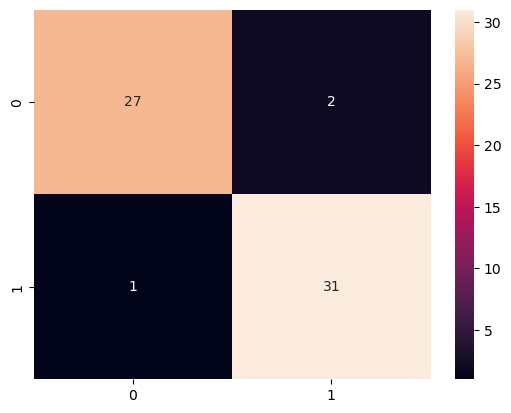

In [66]:
import seaborn as sns
sns.heatmap(confusion, annot=True)

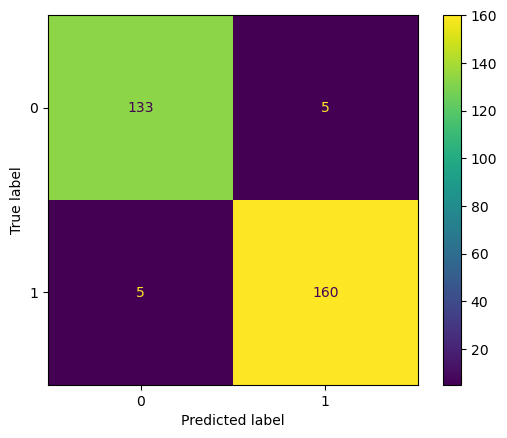

In [67]:
"""
Membuat prediksi cepat
"""
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y)

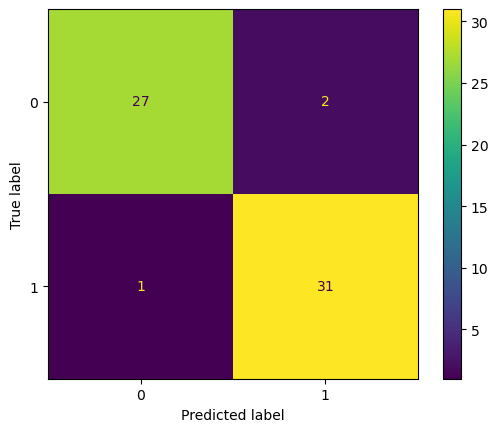

In [68]:
"""
Hanya menampilkan hasil prediksi saja
"""
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

### Classification Report

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        29
           1       0.94      0.97      0.95        32

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



### 4.2.2 Regression model evaluation metrics

1. r^2 or coefficien of determinan
2. Mean absolut error (MAE)
3. Mean square error (MSE)

**R^2-Square**

In [70]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [71]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)

0.806652667101436

**Mean absolut error (MAE)**

In [72]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_pred)

0.32656738464147306

**Mean Square Error (MSE)**

In [73]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.25336408094921037

### 4.2.3 Finally using the `scoring` parameter

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [75]:
np.random.seed(42)

# Cross-validation accuracy
cv_accu = cross_val_score(clf, X, y, cv=5, scoring=None) # scoring=None == accuracy
cv_accu

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [76]:
# Cross-validation accuracy
print(f"Cross Validation Accuracy: {np.mean(cv_accu) * 100:.2f} %")

Cross Validation Accuracy: 82.48 %


In [77]:
# Cross-validation recall
cv_recall = cross_val_score(clf, X, y, cv=5,scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [78]:
# Cross-validation recall
print(f"Cross Validation Recall: {np.mean(cv_recall) * 100}")

Cross Validation Recall: 84.24242424242424


In [79]:
# Cross-validation precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.80555556, 0.90322581, 0.83870968, 0.78787879, 0.76923077])

In [80]:
# Cross-validation precision
print(f"Cross Validation Precision: {np.mean(cv_precision) * 100}")

Cross Validation Precision: 82.09201193072161


Let's see `scoring` parameter for regression

In [81]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

regr = RandomForestRegressor(n_estimators=100)

In [82]:
cv_accu_regr = cross_val_score(regr, X, y, cv=5, scoring=None)
cv_accu_regr

array([0.51688816, 0.70280719, 0.74200859, 0.61659773, 0.68247339])

In [83]:
cv_mae = cross_val_score(regr, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mae

array([-0.51328085, -0.35070703, -0.37304367, -0.44907837, -0.46924468])

## 4.3 Using diffren evaluation metrics as Scikit-learn function

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Setup numpy
np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf5 = RandomForestClassifier(n_estimators=100)

# Fit model
clf5.fit(X_train, y_train)

# Evaluation model with evaluations function
y_preds = clf5.predict(X_test)
accu_score = accuracy_score(y_test, y_preds)
precisi = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
print(f"Accuracy: {accu_score}\nPrecision: {precisi}\nRecall: {recall}\nF1: {f1}")

Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384616


In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup numpy
np.random.seed(42)

# Create X & y
X = housing_df.drop("MedHouseVal", axis=1)
y = housing_df["MedHouseVal"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
reg5 = RandomForestRegressor(n_estimators=100)

# Fit model
reg5.fit(X_train, y_train)

# Evaluation model with evaluations function
y_preds = reg5.predict(X_test)
r2 = r2_score(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
print(f"R2: {r2}\nMAE: {mae}\nMSE: {mse}")

R2: 0.806652667101436
MAE: 0.32656738464147306
MSE: 0.25336408094921037


## 5. Improving a model

First Prediction = Baseline prediction. First model = Baseline model.

From data perspective:
* Could we a collect more data ? (generally, the more data, more batter)
* Could we improve our data ?

From model prespective:
* Is there a better model we could use ?
* Could we improve the current model ?

Hyperparameters vs Parameters
* Parameters = model find these patterns in data.
* Hyperparameters = Setting on a model you can adjust to (potentially) improve its ability to find pattern

Three adjust model with Hyperparamers:
1. By Hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

We're going to try and adjust:
- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimator`

In [86]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation 
    """

    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy" : round(accuracy, 2),
        "precision" : round(precision, 2),
        "recall" : round(recall, 2),
        "f1" : round(f1, 2)
    }
    print(f"Accuracy: {accuracy * 100 :.2f}%\nPrecision : {precision :.2f}\nRecall : {recall :.2f}\nF1 : {f1 :.2f}")
    return metric_dict

In [87]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffle = heart_disease.sample(frac=1)

# Create X & y
X = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# split the data train, validation, and test set
train_split = round(0.7 * len(heart_disease_shuffle))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffle))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[:valid_split], y[:valid_split]

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make baselin eprediction
y_preds = clf.predict(X_valid)

#vEvaluation the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision : 0.81
Recall : 0.88
F1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [88]:
clf_2 = RandomForestClassifier(max_depth=9)
clf_2.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

baseline_metrics_2 = evaluate_preds(y_valid, y_preds)
baseline_metrics_2

Accuracy: 82.22%
Precision : 0.81
Recall : 0.88
F1 : 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

### Hyperparamers tunning with RandomizedSearchCV

In [89]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 150, 200, 500, 1000],
    "max_depth": [None, 10, 20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "max_features": ["sqrt", "log2"],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

rs_clf = RandomizedSearchCV(
    estimator=clf,
    param_distributions=grid,
    n_iter=10,
    cv=5,
    verbose=True
)

rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 100, 150, 200, 500,
                                                         1000]},
                   verbose=True)

In [94]:
clf_y_rs = rs_clf.predict(X_valid)
rs_metrics = evaluate_preds(y_valid, clf_y_rs)

Accuracy: 88.89%
Precision : 0.86
Recall : 0.96
F1 : 0.91


### Hyperparameters tuning with GridSearchCV

In [92]:
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators": [10, 100, 150],
    "max_depth": [20, 30, 40, 50],
    "min_samples_split": [2, 5, 10],
    "max_features": ["log2"],
    "min_samples_leaf": [2, 4]
}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffle.drop("target", axis=1)
y = heart_disease_shuffle["target"]

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(
    estimator=clf,
    param_grid=grid,
    cv=5,
    verbose=2
)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; to

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [20, 30, 40, 50],
                         'max_features': ['log2'], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 100, 150]},
             verbose=2)

In [95]:
clf_y_gs = gs_clf.predict(X_valid)
gs_metrics = evaluate_preds(y_valid, clf_y_gs)

Accuracy: 82.22%
Precision : 0.79
Recall : 0.92
F1 : 0.85


<Axes: >

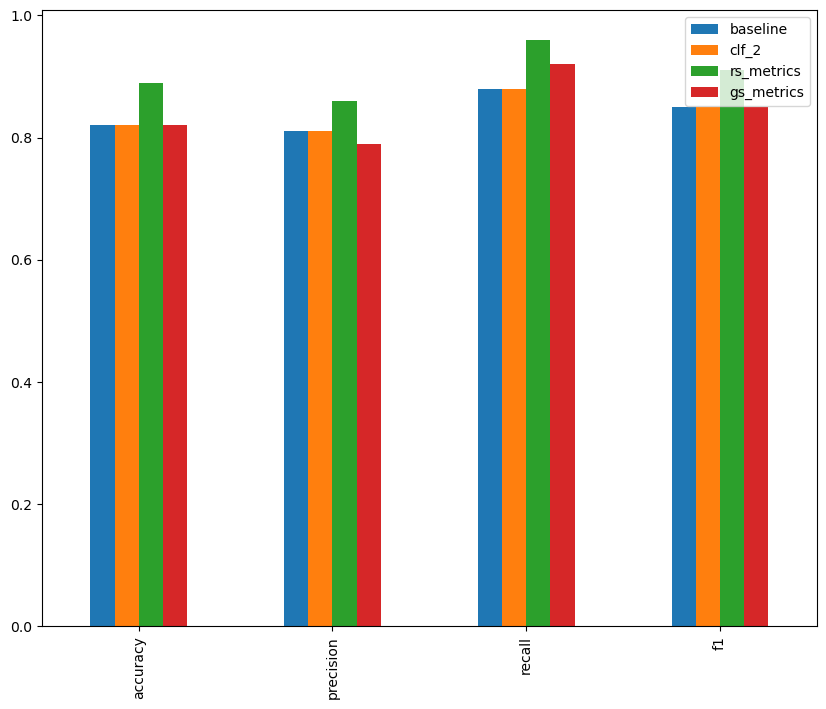

In [96]:
compare_metrics = pd.DataFrame({
    "baseline": baseline_metrics,
    "clf_2": baseline_metrics_2,
    "rs_metrics": rs_metrics,
    "gs_metrics": gs_metrics
})

compare_metrics.plot.bar(figsize=(10, 8))

## 7. Putting it all together

In [120]:
# Gettinga data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup Random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data = data.dropna(subset=["Price"])

# Define different features and transformer pipeline
category_features = ["Make", "Colour"]
category_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("OneHot", OneHotEncoder(handle_unknown="ignore"))
])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

number_feature =["Odometer (KM)"]
number_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
])

# Setup preprocessing steps
preprocessor = ColumnTransformer(transformers=[
    ("cat", category_transformer, category_features),
    ("door", door_transformer, door_feature),
    ("num", number_transformer, number_feature)
])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor())
])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.20272936910558048

**Hyperparameter tuning with pipeling**

In [131]:
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [500, 1000],
    "model__min_samples_leaf": [ 6, 10],
    "model__min_samples_split": [5, 10],
    "model__max_depth": [None, 5],
    "model__max_features": [2, 10]
}

gs_model = GridSearchCV(estimator=model, param_grid=pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END model__max_depth=None, model__max_features=2, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=2, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=2, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   1.2s
[CV] END model__max_depth=None, model__max_features=2, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=500, preprocessor__num__imputer__strategy=mean; total time=   1.4s
[CV] END model__max_depth=None, model__max_features=2, model__min_samples_leaf=6, model__min_samples_split=5, model__n_estimators=500, preprocessor__n

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('OneHot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': [2, 10],
                         'model__min_samples_leaf': [6, 10],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [500, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [136]:
gs_model.score(X_test, y_test)

0.2960954256942002